In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import loadrit
import util

In [3]:
nr = loadrit.RITwave(1150)

In [4]:
nr_h22 = nr.h22()

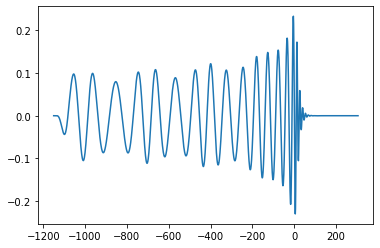

In [5]:
plt.plot(nr_h22.sample_times,nr_h22.data.real)

In [6]:
nr.metadata

{'catalog-tag': 'RIT:eBBH:1150',
 'resolution-tag': 'n100',
 'id-tag': 'ecc',
 'run-name': 'D11.33_q0.25_a0.0_0.0_e0.085_opt_n100',
 'data-type': 'NR',
 'system-type': 'Nonspinning',
 'comments': 'none',
 'authors-emails': 'JamesHealy<jchsma@rit.edu>,CarlosLousto<colsma@rit.edu>',
 'simulation-bibtex-keys': '',
 'code-bibtex-keys': 'Campanelli:2005dd',
 'initial-data-bibtex-keys': 'Bowen:1980yu,Brandt:1997tf,Ansorg:2004ds',
 'quasicircular-bibtex-keys': 'Husa:2007rh,Buonanno:2010yk,Healy:2017zqj',
 'eccentricity-bibtex-keys': 'Campanelli:2008nk',
 'extrapolation-bibtex-keys': 'Nakano:2015pta',
 'code': 'LazEv',
 'evolution-system': 'BSSN',
 'evolution-gauge': '1+log/Gamma-driver(eta=2.0)',
 'cfl': '0.333333333333333',
 'fd-order': '6',
 'dissipation-order': '5',
 'eccentricity-measurement-method': 'Pqc*sqrt(1-e)',
 'eccentricity': '0.0850000000',
 'Msun': '50',
 'freq-start-22': '0.007390109739',
 'freq-start-22-Hz-1Msun': '1500',
 'number-of-orbits': '7.75588168705747',
 'initial-data

In [7]:
mtotal=60
par = util.get_parameter(mtotal,nr.metadata)

In [8]:
hp = nr.hp22_phyunit(**par)

Text(0, 0.5, 'Strain')

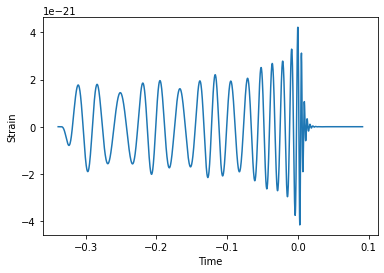

In [9]:
plt.plot(hp.sample_times,hp)
plt.xlabel('Time')
plt.ylabel('Strain')

In [10]:
from pycbc.waveform import get_td_waveform

In [11]:
dt = 1/4096

In [12]:
hp, _ = get_td_waveform(**par,
                                 approximant='SEOBNREHM',
                                 delta_t=dt,
                                 f_lower=20,is_only_22=1)

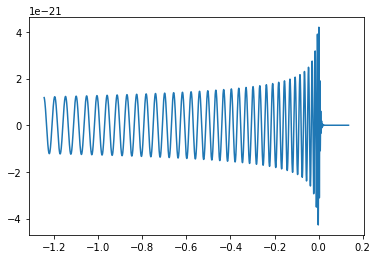

In [13]:
plt.plot(hp.sample_times,hp)

In [14]:
par

{'mass1': 47.99990003661456,
 'mass2': 12.000099963385443,
 'spin1z': 0.0,
 'spin2z': 1.41265999797829e-06,
 'distance': 100,
 'inclination': 0,
 'coa_phase': 0,
 'eccentricity': 0}

In [15]:
par.update({'eccentricity':0.5})

In [16]:
hp_e, _ = get_td_waveform(**par,
                                 approximant='SEOBNREHM',
                                 delta_t=dt,
                                 f_lower=20,is_only_22=1)

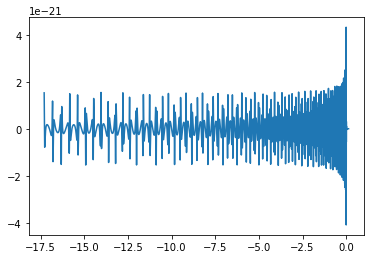

In [17]:
plt.plot(hp_e.sample_times,hp_e)

In [18]:
import overlap
#import importlib
#importlib.reload(overlap)

In [19]:
overlap.get_overlap(e=0.1,mtotal=60,nr_class=nr)

0.8179432698075033

In [20]:
hp_s, nr_s = overlap.get_overlap(0.1,mtotal=60,nr_class=nr,validation=True)

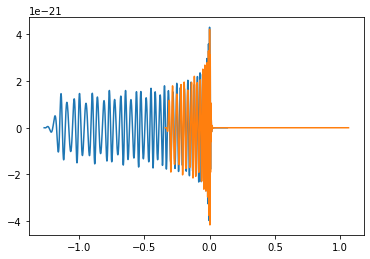

In [21]:
plt.plot(hp_s.sample_times,hp_s)
plt.plot(nr_s.sample_times,nr_s)
plt.xlim()